<a href="https://colab.research.google.com/github/AayushPaigwar/Deep-Learning-Fashion-MINST/blob/master/Deep_Learning_Fashion_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Deep Learning- Fashion MNIST Data Classification**

**1) IMPORTING NECESSARY LIBRARIES**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Loading Fashion MNIST data

In [3]:
(X_train, y_train),(X_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape,"------", y_train.shape ,"------",X_test.shape, "------", y_test.shape

((60000, 28, 28),
 '------',
 (60000,),
 '------',
 (10000, 28, 28),
 '------',
 (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = [	"T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

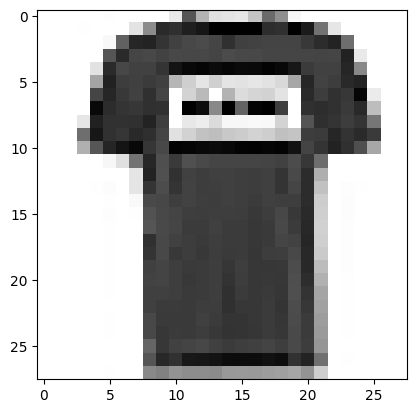

In [8]:
plt.imshow(X_train[1],cmap= 'Greys')

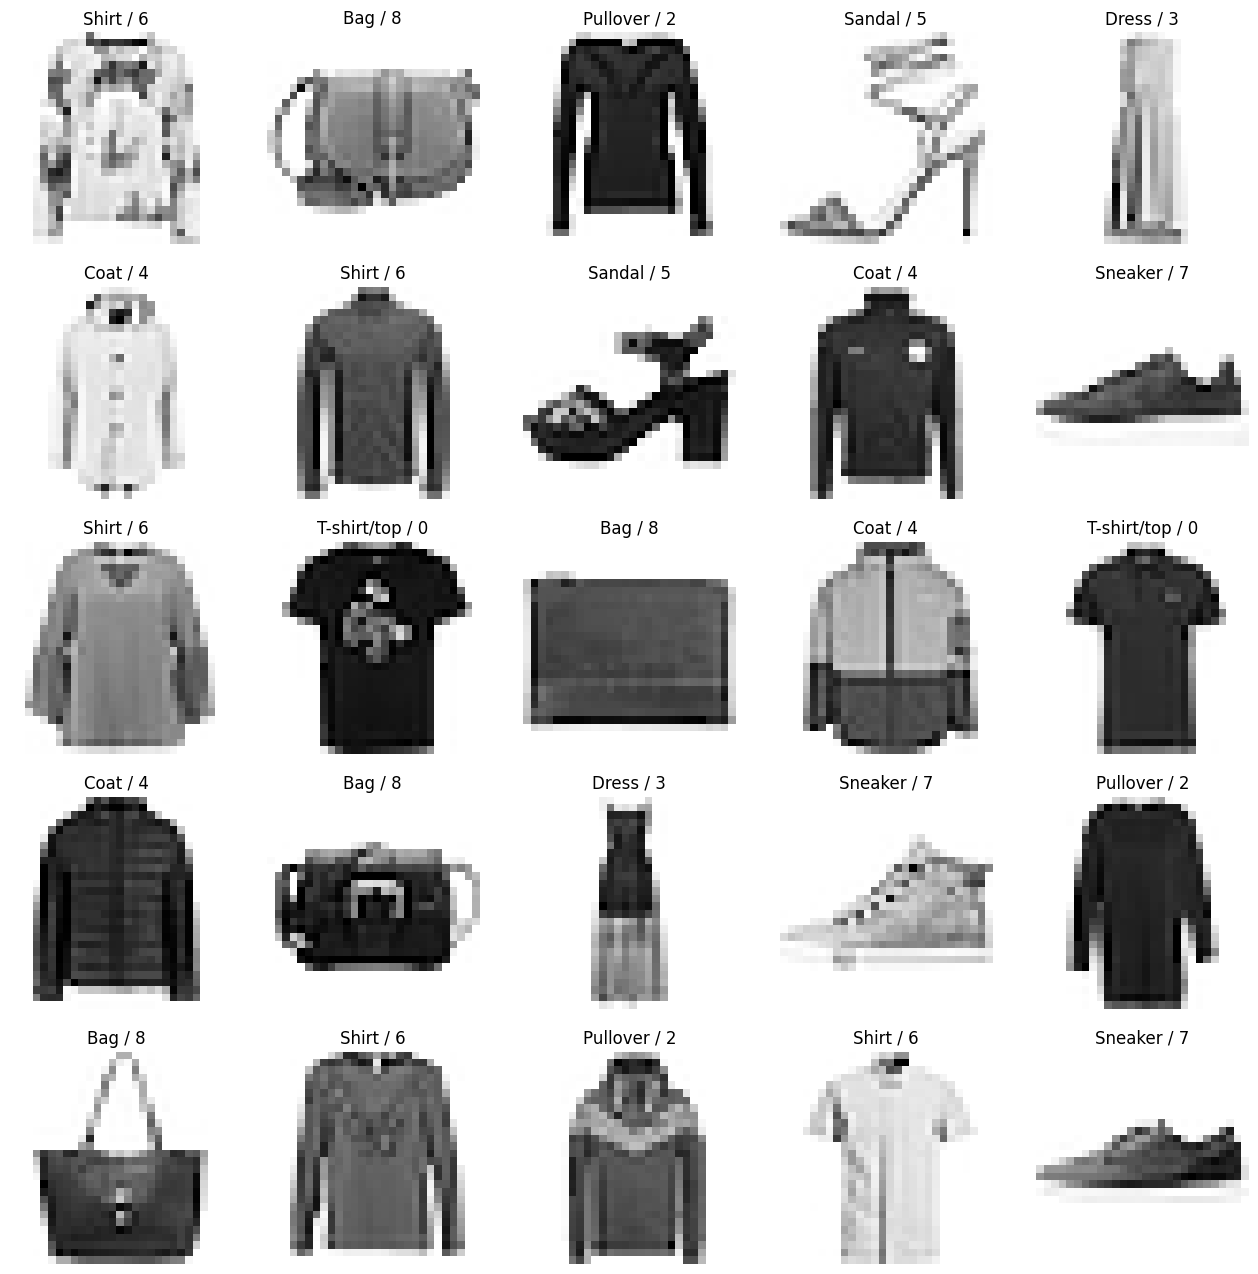

In [9]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [10]:
X_train.ndim

3

In [11]:
X_train = np.expand_dims(X_train,-1)

In [12]:
X_train.ndim

4

In [13]:
X_test=np.expand_dims(X_test,-1)

###FEATURE SCALING

In [14]:
X_train = X_train/255
X_test= X_test/255

### SPLIT DATASET

In [15]:
from sklearn.model_selection import  train_test_split
X_train,X_Validation,y_train,y_Validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [16]:
X_train.shape,X_Validation.shape,y_train.shape,y_Validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

##**3) BUILDING CNN MODEL**

In [17]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size= 3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')

])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_Validation,y_Validation))

Epoch 1/10
94/94 [==============================] - 29s 296ms/step - loss: 0.6192 - accuracy: 0.7956 - val_loss: 0.4156 - val_accuracy: 0.8571
Epoch 2/10
94/94 [==============================] - 27s 283ms/step - loss: 0.3741 - accuracy: 0.8689 - val_loss: 0.3565 - val_accuracy: 0.8761
Epoch 3/10
94/94 [==============================] - 27s 286ms/step - loss: 0.3242 - accuracy: 0.8856 - val_loss: 0.3288 - val_accuracy: 0.8842
Epoch 4/10
94/94 [==============================] - 29s 304ms/step - loss: 0.2973 - accuracy: 0.8954 - val_loss: 0.3236 - val_accuracy: 0.8878
Epoch 5/10
94/94 [==============================] - 28s 294ms/step - loss: 0.2766 - accuracy: 0.9026 - val_loss: 0.2995 - val_accuracy: 0.8947
Epoch 6/10
94/94 [==============================] - 28s 294ms/step - loss: 0.2616 - accuracy: 0.9071 - val_loss: 0.2962 - val_accuracy: 0.8962
Epoch 7/10
94/94 [==============================] - 27s 283ms/step - loss: 0.2448 - accuracy: 0.9129 - val_loss: 0.2894 - val_accuracy: 0.9003

In [21]:
y_pred=model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 7ms/step


array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, ..., 0.12, 0.14, 0.  ]], dtype=float32)

In [22]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2705 - accuracy: 0.9010


[0.2704910635948181, 0.9010000228881836]

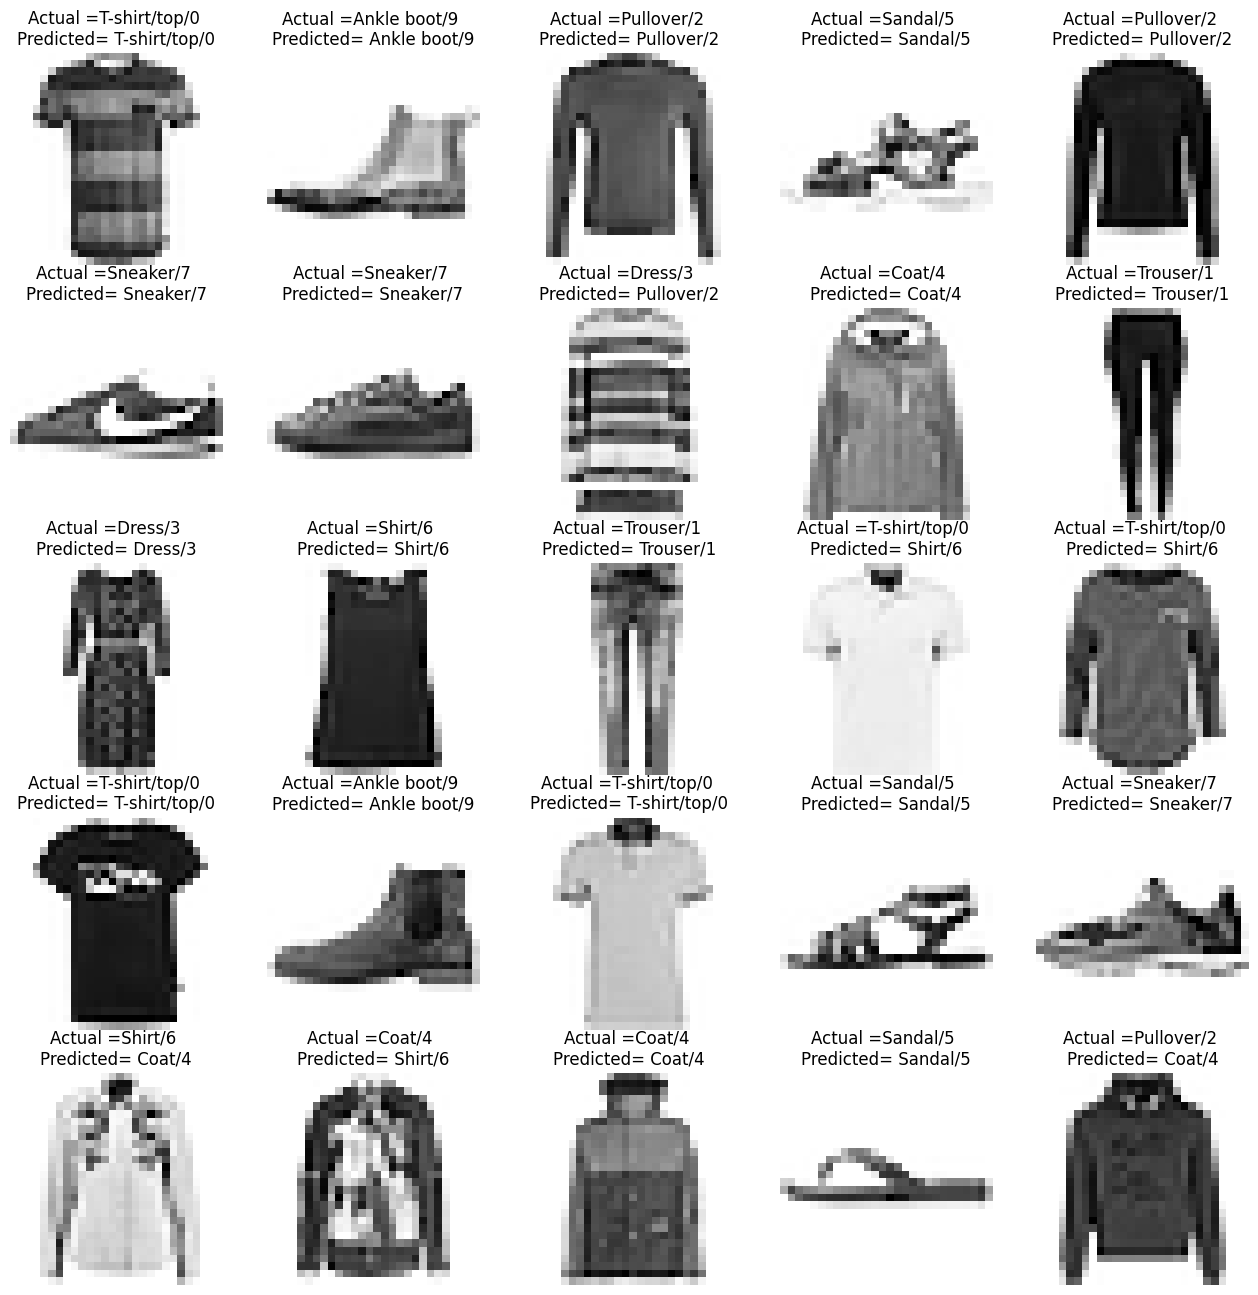

In [24]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual ={}/{} \nPredicted= {}/{}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

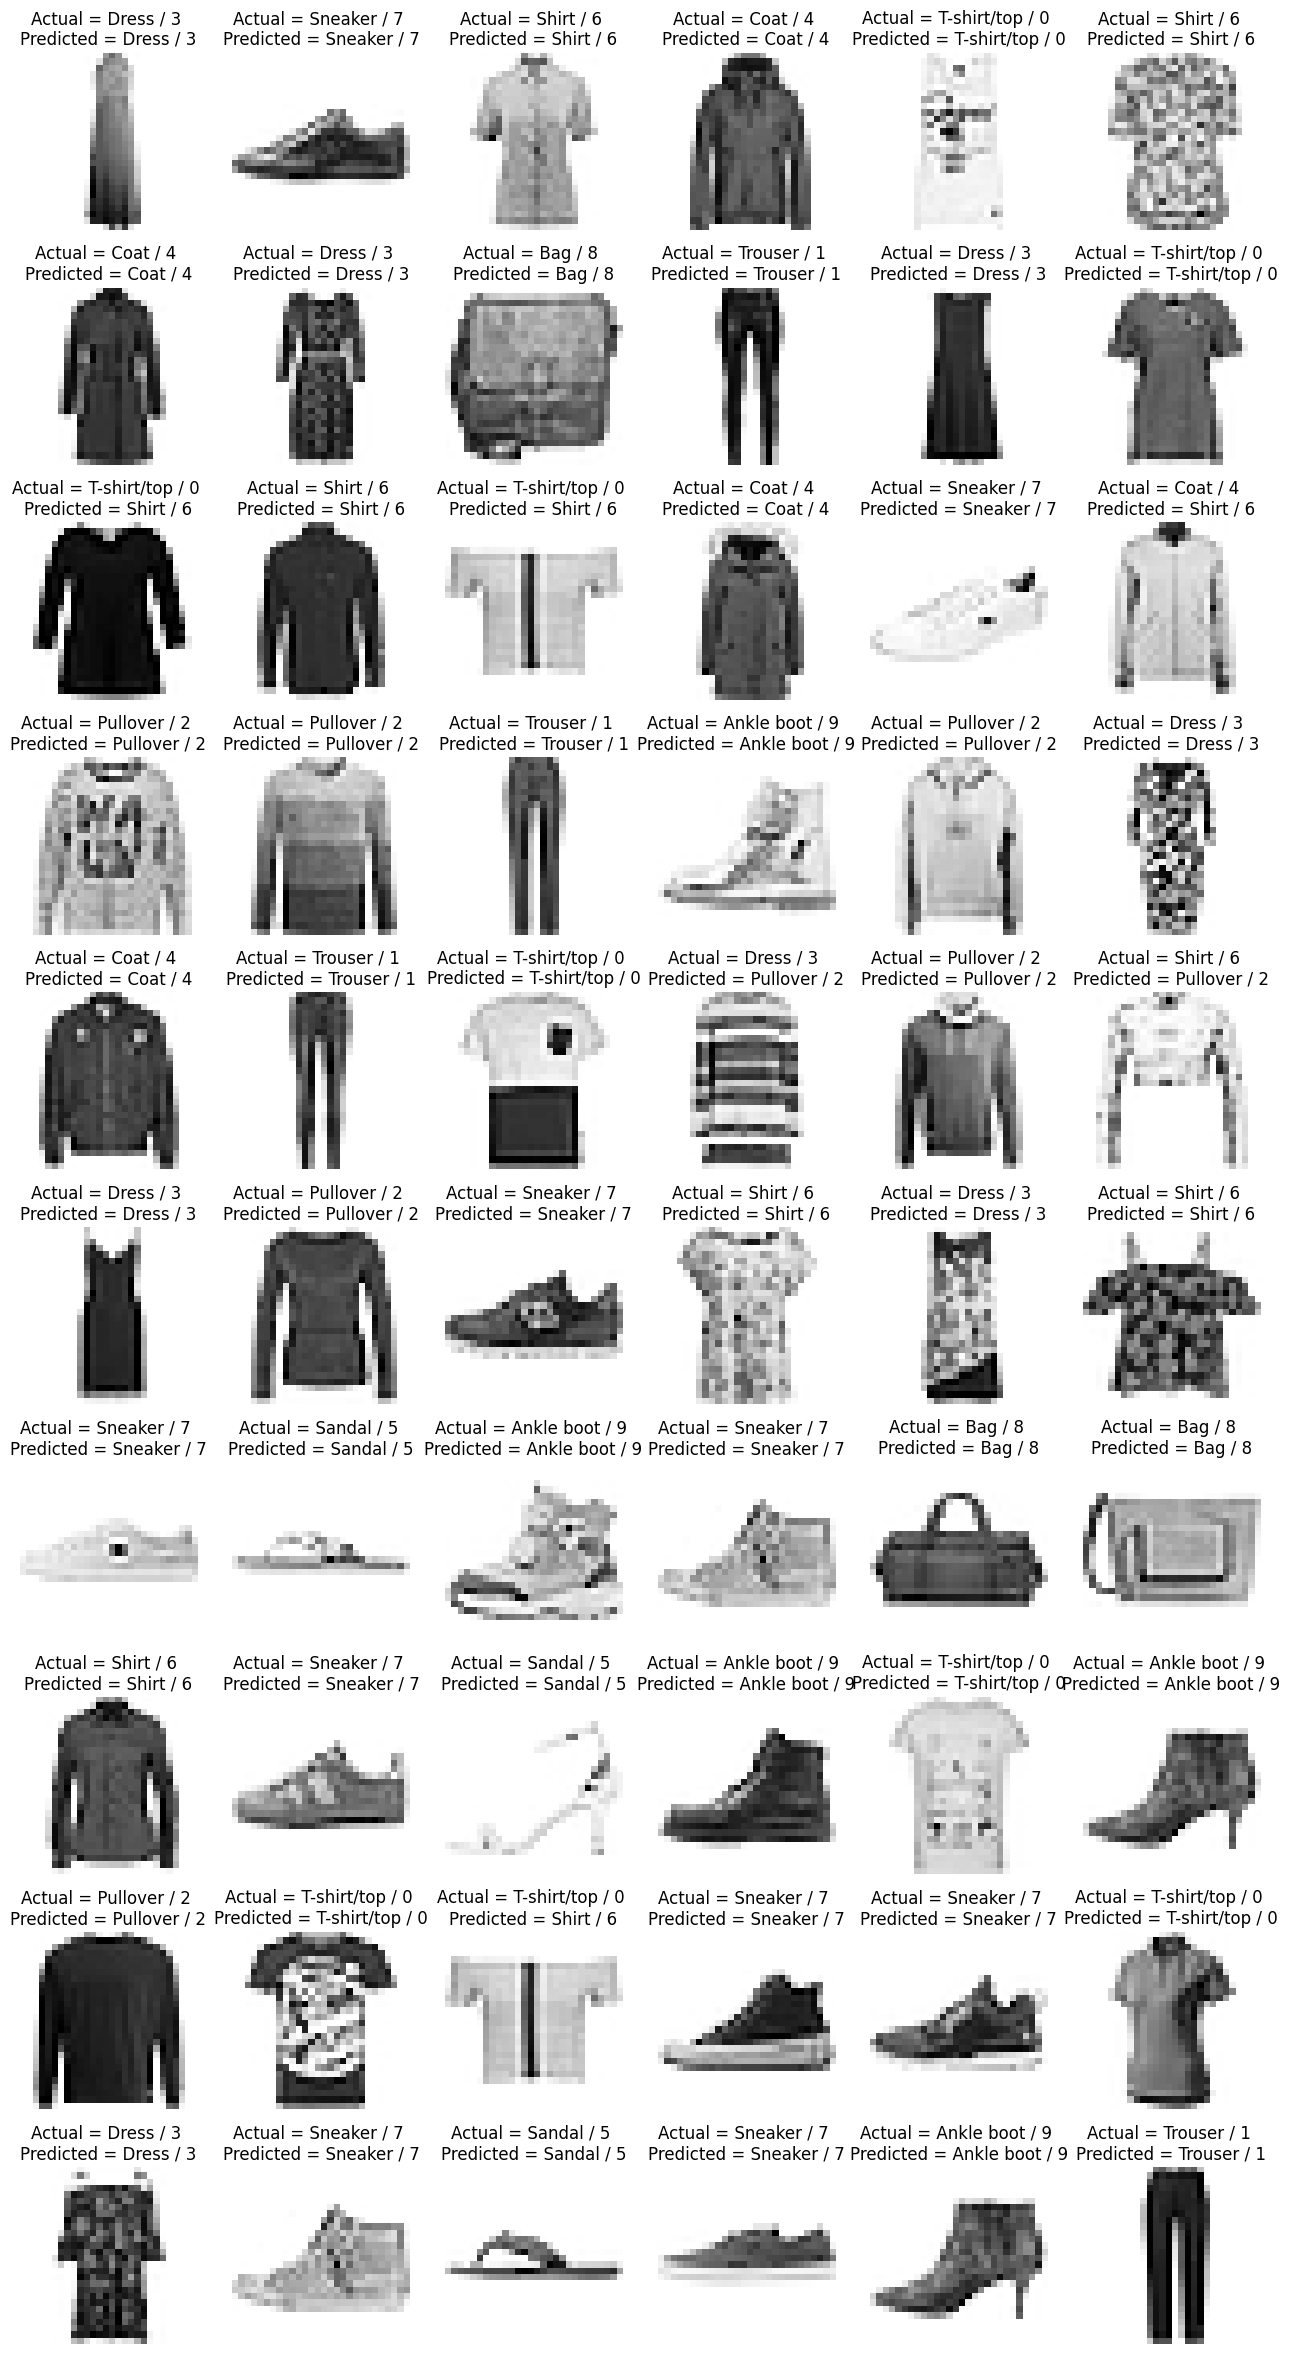

In [25]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')
     

###**Confusion Matrix**

In [26]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.88      0.84      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.87      0.83      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.74      0.69      0.71      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



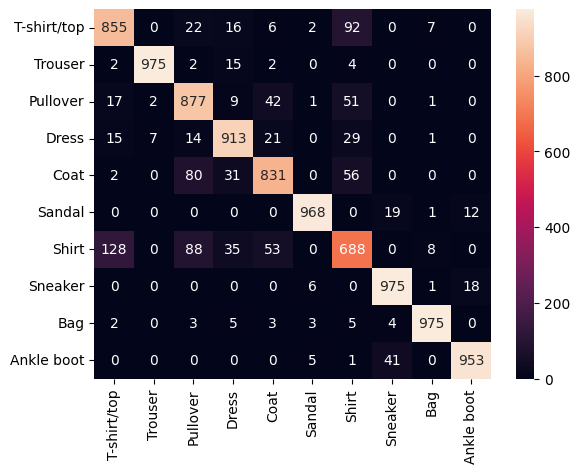

In [27]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)
 
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

###**Saving Model**

In [28]:
model.save('fashion_mnist_cnn_model.h5')

##**Build 2 Complex CNN**

In [29]:
#Building CNN Model

cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
#Compile the model

cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model2.save('fashion_mnist_cnn_model2.h5')

Epoch 1/20
94/94 [==============================] - 34s 349ms/step - loss: 1.0491 - accuracy: 0.6080 - val_loss: 0.5835 - val_accuracy: 0.7689
Epoch 2/20
94/94 [==============================] - 34s 364ms/step - loss: 0.5558 - accuracy: 0.7897 - val_loss: 0.4741 - val_accuracy: 0.8257
Epoch 3/20
94/94 [==============================] - 32s 346ms/step - loss: 0.4720 - accuracy: 0.8255 - val_loss: 0.4343 - val_accuracy: 0.8373
Epoch 4/20
94/94 [==============================] - 34s 360ms/step - loss: 0.4163 - accuracy: 0.8464 - val_loss: 0.3863 - val_accuracy: 0.8591
Epoch 5/20
94/94 [==============================] - 32s 343ms/step - loss: 0.3767 - accuracy: 0.8622 - val_loss: 0.3740 - val_accuracy: 0.8557
Epoch 6/20
94/94 [==============================] - 34s 361ms/step - loss: 0.3477 - accuracy: 0.8729 - val_loss: 0.3315 - val_accuracy: 0.8763
Epoch 7/20
94/94 [==============================] - 33s 349ms/step - loss: 0.3246 - accuracy: 0.8823 - val_loss: 0.3166 - val_accuracy: 0.8838

In [30]:
#very complex model
 
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])
 
#Complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
 
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_Validation, y_Validation))
 
cnn_model3.save('fashion_mnist_cnn_model3.h5')
 
cnn_model3.evaluate(X_test, y_test)

Epoch 1/50
94/94 [==============================] - 77s 787ms/step - loss: 1.2057 - accuracy: 0.5265 - val_loss: 0.6291 - val_accuracy: 0.7551
Epoch 2/50
94/94 [==============================] - 78s 832ms/step - loss: 0.5852 - accuracy: 0.7761 - val_loss: 0.4915 - val_accuracy: 0.8117
Epoch 3/50
94/94 [==============================] - 72s 772ms/step - loss: 0.4840 - accuracy: 0.8220 - val_loss: 0.4134 - val_accuracy: 0.8455
Epoch 4/50
94/94 [==============================] - 74s 781ms/step - loss: 0.4119 - accuracy: 0.8539 - val_loss: 0.3652 - val_accuracy: 0.8652
Epoch 5/50
94/94 [==============================] - 73s 776ms/step - loss: 0.3643 - accuracy: 0.8716 - val_loss: 0.3354 - val_accuracy: 0.8767
Epoch 6/50
94/94 [==============================] - 73s 775ms/step - loss: 0.3307 - accuracy: 0.8831 - val_loss: 0.3232 - val_accuracy: 0.8847
Epoch 7/50
94/94 [==============================] - 78s 828ms/step - loss: 0.3023 - accuracy: 0.8936 - val_loss: 0.2951 - val_accuracy: 0.8942

[0.5059301257133484, 0.9031000137329102]